In [ ]:
''' Using Plotly express as px, source the data using the command px.data.gapminder() and save it into a dataframe. Based on the data, map the following information with the appropriate geographical plot. Map out:

In [10]:
#The mean life expectancy of all the Asian countries according to the data.z
df=px.data.gapminder()
df.head(20)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
5,Afghanistan,Asia,1977,38.438,14880372,786.113360,AFG,4
6,Afghanistan,Asia,1982,39.854,12881816,978.011439,AFG,4
7,Afghanistan,Asia,1987,40.822,13867957,852.395945,AFG,4
8,Afghanistan,Asia,1992,41.674,16317921,649.341395,AFG,4
9,Afghanistan,Asia,1997,41.763,22227415,635.341351,AFG,4


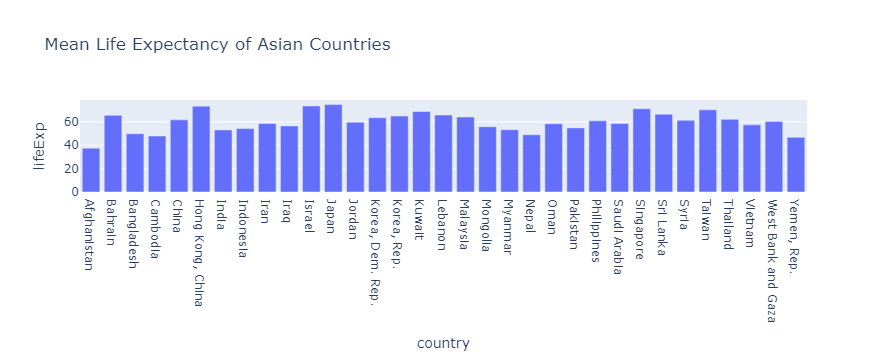

In [19]:

import pandas as pd
import plotly.express as px
df=px.data.gapminder()
asian_df=df[df['continent']=='Asia']
mean_lifeExp=asian_df.groupby('country')['lifeExp'].mean().reset_index()
fig = px.bar(mean_lifeExp, x='country', y='lifeExp', title='Mean Life Expectancy of Asian Countries')
fig.show()


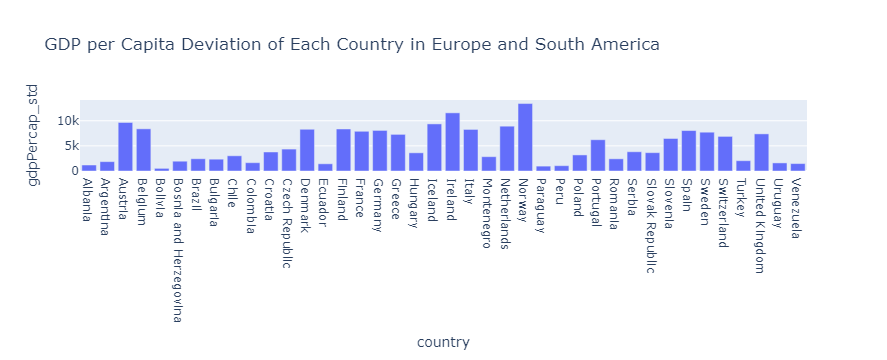

In [21]:
# Deviation in GDP of each country in Europe and South America.

filtered_df=df[df['continent'].isin(['Europe','Americas'])]
south_america_countries= ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 
    'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
filtered_df= filtered_df [
(filtered_df['continent']== 'Europe') |
(filtered_df['country'].isin(south_america_countries))
]
gdp_deviation = filtered_df.groupby('country')['gdpPercap'].std().reset_index()
gdp_deviation.columns= ['country', 'gdpPercap_std']
fig= px.bar(gdp_deviation,x='country',y='gdpPercap_std', title= 'GDP per Capita Deviation of Each Country in Europe and South America')
fig.show()

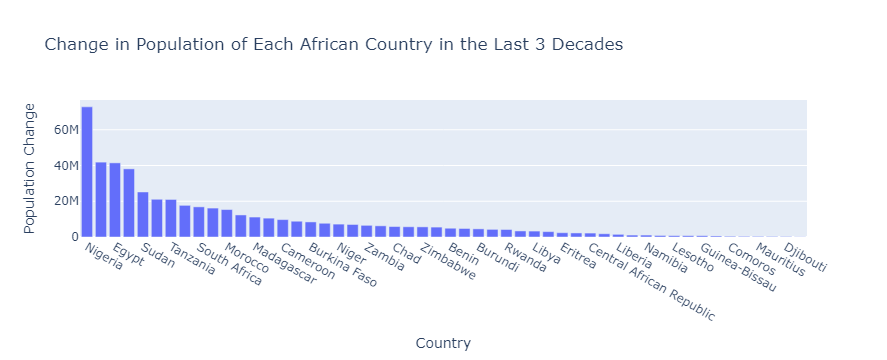

In [24]:
# The change in population of each African country in the last 3 decades.

africa_df=df[df['continent']== 'Africa']
last_year=africa_df['year'].max()
start_year=last_year-30
filtered_df=africa_df[africa_df['year'].isin([start_year,last_year])]
pivot_df= filtered_df.pivot(index='country', columns='year',values='pop').reset_index()
pivot_df['pop_change']=pivot_df[last_year]-pivot_df[start_year]
pivot_df=pivot_df.sort_values(by='pop_change',ascending=False)
fig = px.bar(pivot_df, x='country', y='pop_change', title='Change in Population of Each African Country in the Last 3 Decades',
             labels={'pop_change': 'Population Change', 'country': 'Country'})
fig.show()